<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/From%20Pre-Recorded%20Lecture/Qiskit_Practice_Lecture_12.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Qiskit Practice - Lecture 12</font>

## Install Library

In [ ]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit==0.46.0
!pip install pylatexenc
!pip install qiskit-aer==0.13.0
#!pip install qiskit-ibm-runtime
#!pip install qiskit-ibm-provider
!pip install qiskit-ignis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=790a74b40121d1a254024d7e465bce99bcb158835c5dd6c48ad7e6c84f267568
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library First

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

#from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts

from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

## Measurement Error Mitigation

### Noice Model Function

In [ ]:
def get_noise(p):
  error_message = pauli_error([('X', p), ('I', 1-p)])

  noise_model = NoiseModel()

  #apply measurement error to noise model
  noise_model.add_all_qubit_quantum_error(error_message, "measure")

  return noise_model

### Create Noise Model

In [ ]:
# 1% chance of happening measurement error
noise_model = get_noise(0.01)

### Effect of Noise Model
00 01 10 11

In [ ]:
all_state = ['00', '01', '10', '11']

for state in all_state:
  qc = QuantumCircuit(2,2)

  if state[0] == '1':
    qc.x(1)
  if state[1] == '1':
    qc.x(0)

  qc.measure([0, 1], [0, 1])

  simulator = AerSimulator()
  t_tc = transpile(qc, simulator)

  job = simulator.run(t_tc, shots=10000, noise_model=None)
  result = job.result()
  counts = result.get_counts()

  print(state + ' become', counts)

00 become {'00': 10000}
01 become {'01': 10000}
10 become {'10': 10000}
11 become {'11': 10000}


### Run with Noise

In [ ]:
all_state = ['00', '01', '10', '11']

for state in all_state:
  qc = QuantumCircuit(2,2)

  if state[0] == '1':
    qc.x(1)
  if state[1] == '1':
    qc.x(0)

  qc.measure([0, 1], [0, 1])

  simulator = AerSimulator()
  t_tc = transpile(qc, simulator)

  job = simulator.run(t_tc, shots=10000, noise_model=noise_model)
  result = job.result()
  counts = result.get_counts()

  print(state + ' become', counts)

00 become {'01': 106, '10': 92, '00': 9802}
01 become {'11': 111, '10': 2, '00': 97, '01': 9790}
10 become {'01': 2, '11': 106, '00': 86, '10': 9806}
11 become {'00': 1, '10': 108, '01': 99, '11': 9792}


## 2 Qubits Circuit
Create general state / complex state with 2 qubits circuit and run it in noise

### Build Circuit

In [ ]:
# create circuit
qc = QuantumCircuit(2, 2)

# apply gates
qc.h(0)
qc.cx(0, 1)

# apply measurement
qc.measure([0, 1], [0, 1])

simulator = AerSimulator()
t_tc = transpile(qc, simulator)

job = simulator.run(t_tc, shots=10000, noise_model=noise_model)
result = job.result()
counts = result.get_counts()
print(state + ' become', counts)

11 become {'01': 109, '10': 102, '00': 4876, '11': 4913}


## Error Mitigation in QisKit

### Creating Calibration Circuit

In [ ]:
qr = QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

### Visualize Calibration Circuit

In [ ]:
for circuit in meas_calibs:
  print('Circuit', circuit.name)
  print(circuit)
  print()

Circuit mcalcal_00
        ░ ┌─┐   
q18_0: ─░─┤M├───
        ░ └╥┘┌─┐
q18_1: ─░──╫─┤M├
        ░  ║ └╥┘
 c0: 2/════╩══╩═
           0  1 

Circuit mcalcal_01
       ┌───┐ ░ ┌─┐   
q18_0: ┤ X ├─░─┤M├───
       └───┘ ░ └╥┘┌─┐
q18_1: ──────░──╫─┤M├
             ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 

Circuit mcalcal_10
             ░ ┌─┐   
q18_0: ──────░─┤M├───
       ┌───┐ ░ └╥┘┌─┐
q18_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 

Circuit mcalcal_11
       ┌───┐ ░ ┌─┐   
q18_0: ┤ X ├─░─┤M├───
       ├───┤ ░ └╥┘┌─┐
q18_1: ┤ X ├─░──╫─┤M├
       └───┘ ░  ║ └╥┘
 c0: 2/═════════╩══╩═
                0  1 



### Run on simulator without Noise

In [ ]:
simulator = AerSimulator()

t_tc = transpile(meas_calibs, simulator)
job = simulator.run(t_tc, shots=10000, noise_model=None)
cal_result = job.result()

### Calibration matrix without noise

In [ ]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

### Create Noise Model

In [ ]:
# 1% chance of happening measurement error
noise_model = get_noise(0.01)

### Run calibration circuit with Noise

In [ ]:
simulator = AerSimulator()

t_tc = transpile(meas_calibs, simulator)
job = simulator.run(t_tc, shots=10000, noise_model=noise_model)
cal_result = job.result()

### Calibration Matrix with Noise

In [ ]:
meas_fitter = CompleteMeasFitter(cal_result, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

## Now create arbitary more general circuit and get noisy result from it with noise model

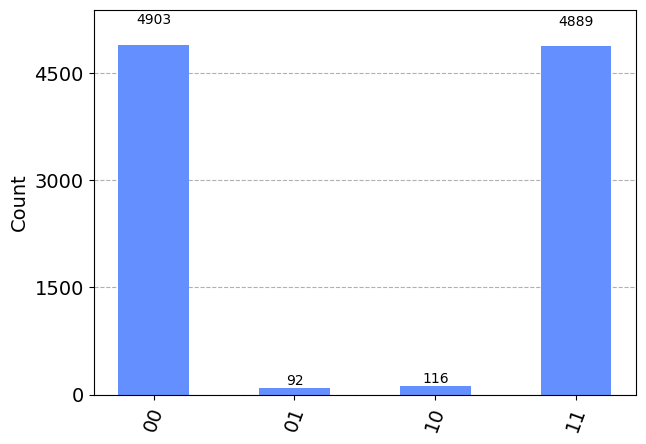

In [ ]:
general_circuit = QuantumCircuit(2, 2)
general_circuit.h(0)
general_circuit.cx(0, 1)
general_circuit.measure([0, 1], [0, 1])

simulator = AerSimulator()

t_tc = transpile(general_circuit, simulator)
job = simulator.run(t_tc, shots=10000, noise_model=noise_model)
noisy_results = job.result()
noisy_counts = noisy_results.get_counts()
plot_histogram(noisy_counts)

### Mitigate Noise for this circuit with the help of measurement fitter created from noisy calibration circuit

In [ ]:
# get the fitter object
meas_fitter = meas_fitter.filter

# results with mitigation
mitigated_results = meas_fitter.apply(noisy_results)
mitigated_counts = mitigated_results.get_counts()

### plot noisy and mitigated results for the circuit

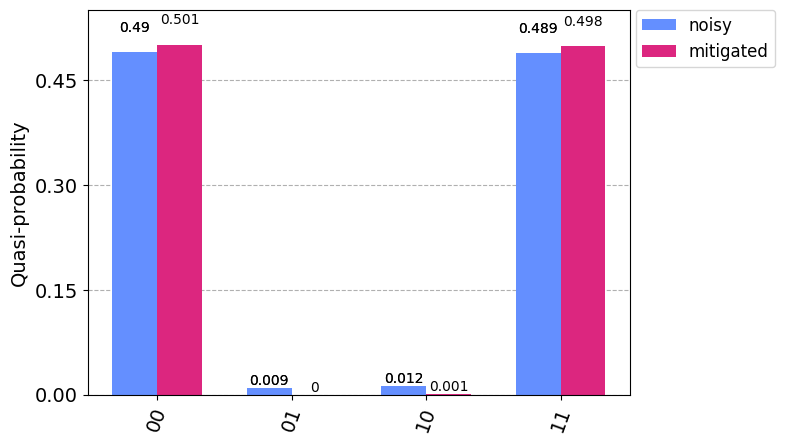

In [ ]:
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

## Create another 2 qubit arbitary general circuit

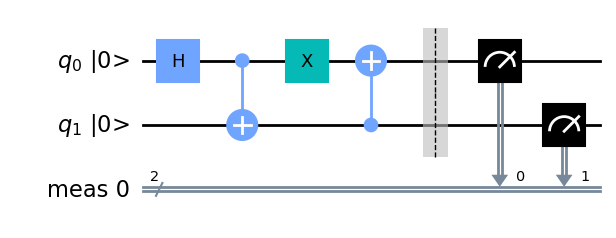

In [ ]:
general_circuit2 = QuantumCircuit(2)

general_circuit2.h(0)
general_circuit2.cx(0, 1)
general_circuit2.x(0)
general_circuit2.cx(1, 0)


general_circuit2.measure_all()

general_circuit2.draw(initial_state=True, output='mpl')

### Run on simulator

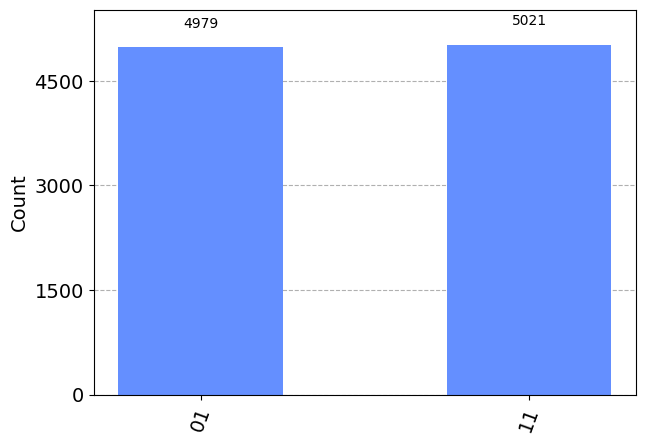

In [ ]:
simulator = AerSimulator()

t_tc = transpile(general_circuit2, simulator)
job = simulator.run(t_tc, shots=10000, noise_model=None)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

### Run on simulator with noise

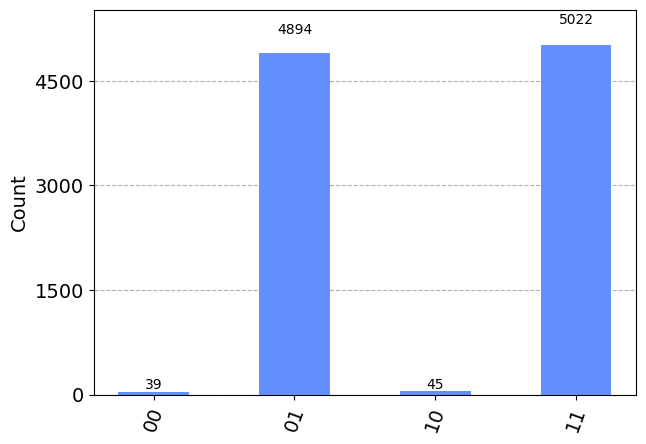

In [ ]:
simulator = AerSimulator()

t_tc = transpile(general_circuit2, simulator)
job = simulator.run(t_tc, shots=10000, noise_model=noise_model)
noisy_results = job.result()
noisy_counts = noisy_results.get_counts()
plot_histogram(noisy_counts)

### Mitigate noise for this circuit

In [ ]:
# get the fitter object
meas_fitter = meas_fitter.filter

# results with mitigation
mitigated_results = meas_fitter.apply(noisy_results)
mitigated_counts = mitigated_results.get_counts()

### plot noisy and mitigated results for the circuit

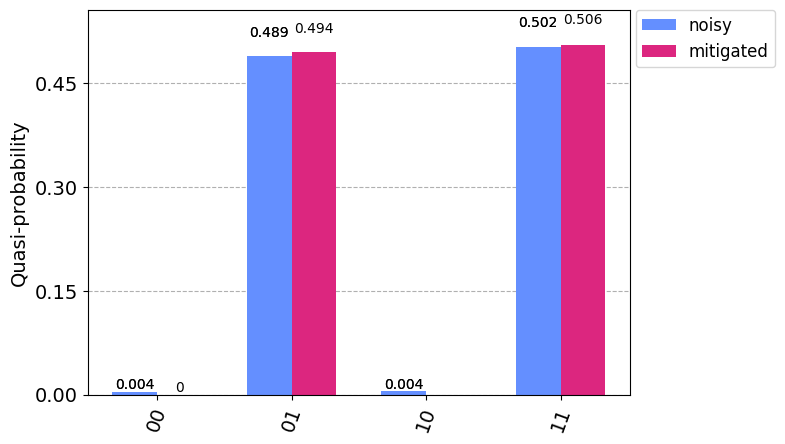

In [ ]:
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

# <center><font size="50" color="red">Thank You</font></center>